<a href="https://colab.research.google.com/github/RiniVarghese/CreditCard_Fraud_Detection_Capstone_Project/blob/Master/CreditCard_Fraud_Detection_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [1]:
# Importing python libraries :

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,confusion_matrix,f1_score,classification_report
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance




# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Data Understanding

In [4]:
path ='/content/gdrive/MyDrive/CreditCardFraudDetection/creditcard.csv'
df = pd.read_csv(path)

df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We can see that all the features in the dataframe are numeric variables. Hence there is no need for conversion from categorical to numeric here in this case.
Also, we can see that, out of the 31 features, 28 features(V1-V28) are the PCA transformed variables as mentioned in the problem statement, hence we dont know which are the base features here.
There are no NULL values present in any of the features,hence no need of any NULL value handling required here.

In [6]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
  max(df['Time'])/(60*60)

47.99777777777778

From the above, we can see that the features V1-V28 are the PCA transformed variables and hence are in present in the similar scale.
For the time feature, we can see minimum value is 0 and max is 172792. From the problem statement we know that Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. . So we can cross verify whether the dataset is containing only the transactions of 2 days as mentioned in the problem statement or more. We can check for this in the next cell.
Concering the Amount feature, we can see the minimum value is 0 and 75th percentage is 77.16 but the maximum is 25691, hence indicating clear presence of Outliers which we need to deal with.
The target variable with us is Class.

We can see that 47.99 hours hence the transactions are of 2 days.

## Exploratory Data Analysis

In [5]:
#Check the fraud/Non_Fraud related records
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print('Percentage of normal transactions: ',normal_share)
print('Percentage of fraud transactions: ',fraud_share)

Percentage of normal transactions:  99.82725143693798
Percentage of fraud transactions:  0.1727485630620034


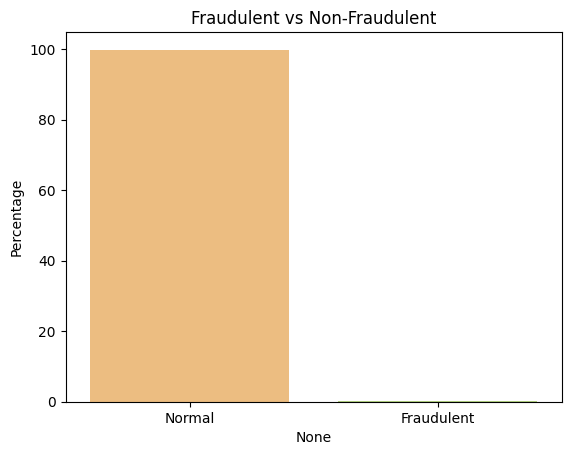

In [6]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
dist_df = pd.DataFrame({'Percentage':[normal_share,fraud_share]},index=['Normal','Fraudulent'])
sns.barplot(x=dist_df.index,y=dist_df['Percentage'],palette='RdYlGn')
plt.title('Fraudulent vs Non-Fraudulent')
plt.show()

In [7]:
dist_df

,Percentage
Normal,99.827251
Fraudulent,0.172749


From the above barplot we can see that, there is clear class imbalance present in the dataset where most of the records are non-fraudulent transactions.
dist_df dataframe shows the percentage details for the same. There are only 0.172% of fraudulent records present in the dataset.

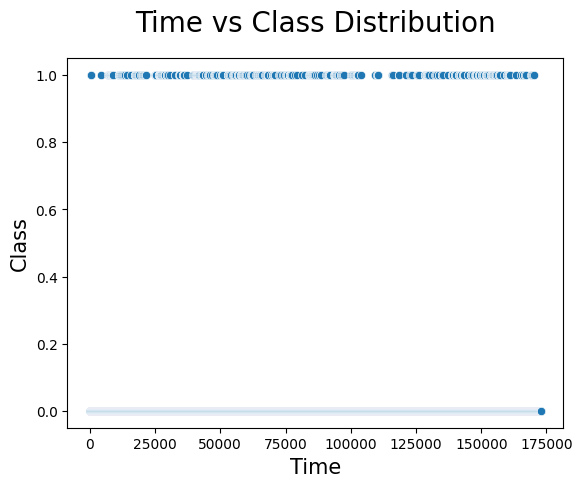

In [8]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x=df['Time'],y=df['Class'])
plt.title('Time vs Class Distribution', size=20, y=1.05)
plt.xlabel('Time', size=15)
plt.ylabel('Class', size=15)
plt.show()

From the above scatter plot between the Class and Time indicates a the fraudulent transactions have happened throughout the given time frame there are no fixed time patterns followed by these fraudulent transactions indicating that the Time feature is not an important feature in our dataframe hence can be removed.

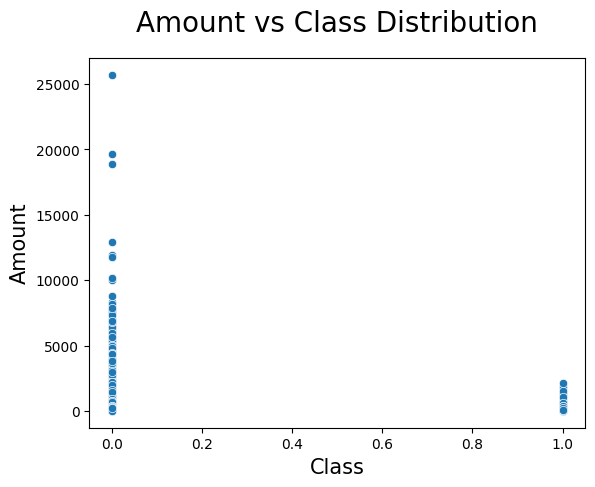

In [9]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x=df['Class'],y=df['Amount'])
plt.title('Amount vs Class Distribution', size=20, y=1.05)
plt.xlabel('Class', size=15)
plt.ylabel('Amount', size=15)
plt.show()

Class 0 which is the non fraudulent transactions have happened for the amounts ranging from 0 to as high as 25000.When we can clearly state transactions more than say, 15000 as outliers, most of the non-fraudulent transactions are in range of 0 to 10000.
At the same time, fraudulent transactions have happened only for smaller amounts - 0 to 5000

In [10]:
# Drop unnecessary columns
df.drop(['Time'],axis=1,inplace=True)

We dropped the Time feature from our dataframe, as said above since there are no value adds this feature presents here. Moreover we couldnt find any time dependent pattern present for the fraudulent transactions.

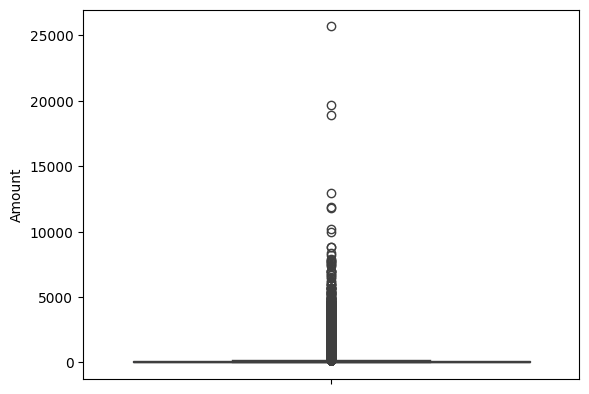

In [11]:
sns.boxplot(y=df['Amount'])


plt.show()

In [8]:
df.loc[df['Amount']>=10000]['Amount'].count()

8

There are only 8 records with transaction amount greater than or equal to 10,000 Euros. We can remove this later on

Text(0.5, 1.0, 'Amount distribution for fraudulent transactions')

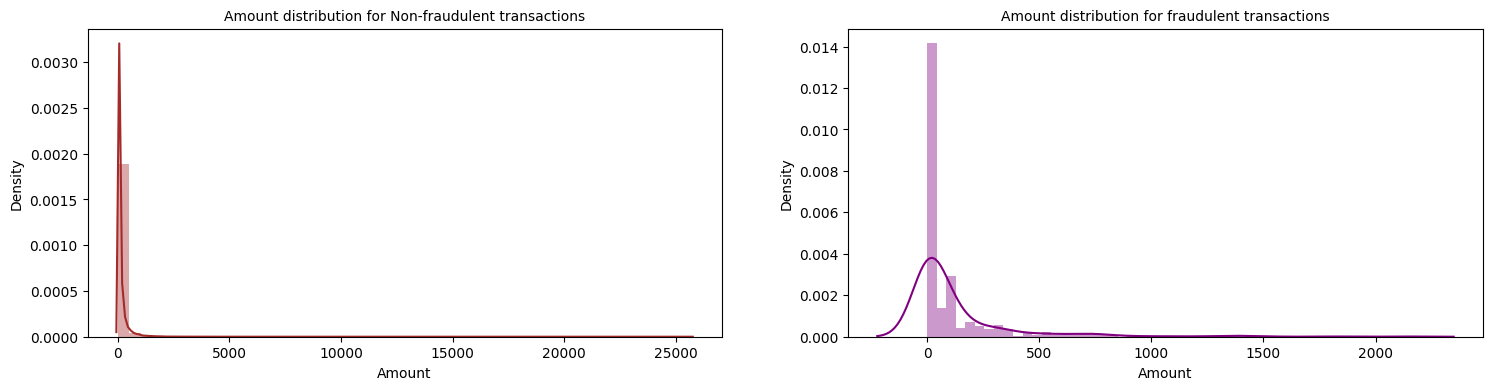

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

#plt.subplot(121)
sns.distplot(df[df['Class']==0]['Amount'],bins=50, ax=ax[0], color='brown')
ax[0].set_title('Amount distribution for Non-fraudulent transactions', fontsize=10)

#plt.subplot(122)
sns.distplot(df[df['Class']==1]['Amount'],bins=50, ax=ax[1], color='purple')
ax[1].set_title('Amount distribution for fraudulent transactions', fontsize=10)

In [9]:
print('Min amount for a fraudulent transaction:', df[df['Class']==1]['Amount'].min())
print('Max amount for a fraudulent transaction:', df[df['Class']==1]['Amount'].max())
print('Min amount for a valid transaction:', df[df['Class']==0]['Amount'].min())
print('Max amount for a valid transaction:', df[df['Class']==0]['Amount'].max())

Min amount for a fraudulent transaction: 0.0
Max amount for a fraudulent transaction: 2125.87
Min amount for a valid transaction: 0.0
Max amount for a valid transaction: 25691.16


In [10]:
print('No of transactions where amount is 0 for fraudulent transactions:',
      df[(df['Class']==1) & (df['Amount']==0)].shape[0])
print('No of transactions where amount is 0 for valid transactions:',
      df[(df['Class']==0) & (df['Amount']==0)].shape[0])

No of transactions where amount is 0 for fraudulent transactions: 27
No of transactions where amount is 0 for valid transactions: 1798


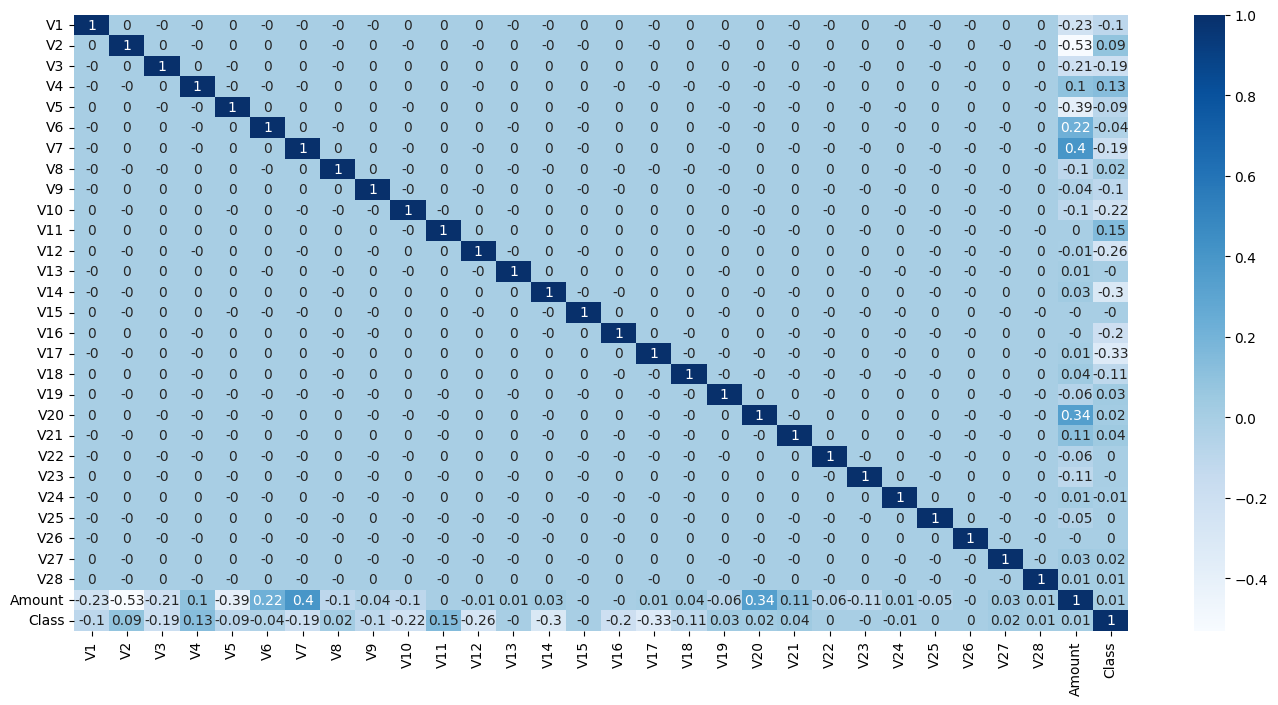

In [19]:
plt.figure(figsize=(17,8))
sns.heatmap(round(df.corr(),2),annot=True,cmap='Blues')
plt.show()

In [11]:
# Understanding more on the correlation in data:
print("Most important features relative to target variable Class")

corr_initial = df.corr()['Class']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(5)

Most important features relative to target variable Class


,Correlation
Class,1.000000
V11,0.154876
V4,0.133447
V2,0.091289
V21,0.040413


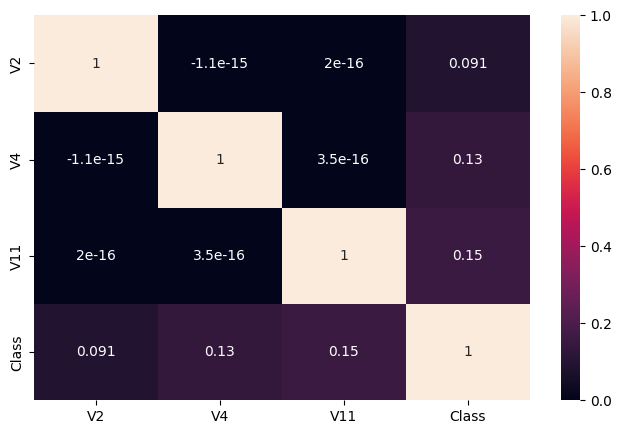

In [12]:
cor = df.corr()
top_feature = cor.index[abs(cor['Class']>0.09)]
plt.subplots(figsize=(8, 5))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [12]:
df_copy1 = df.copy()

Splitting the data into train & test data

In [13]:
X = df.drop(['Class'],axis=1)
y= df['Class']

In [14]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [16]:
X_train.shape


(199364, 29)

In [17]:
X_test.shape

(85443, 29)

In [18]:
y_train.shape

(199364,)

In [19]:
y_test.shape

(85443,)

Feature Scaling using Standard Scaler

In [20]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = StandardScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [21]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
7610,1.160485,0.010653,0.731921,-0.083757,-0.204162,0.309873,-0.503116,0.130077,1.279474,-0.528215,...,-0.109200,-0.167768,-0.142183,0.148065,-0.261307,-0.052688,0.904879,-0.061990,-0.012372,-0.354837
190214,2.054237,-0.078678,-1.233161,0.183785,0.187539,-0.605905,0.102048,-0.183363,0.245017,0.229607,...,-0.169517,-0.263893,-0.636424,0.263862,-0.480128,-0.249245,0.206509,-0.072079,-0.074044,-0.350715
130590,1.434517,-1.560173,-0.783968,-2.432927,0.578638,3.528638,-1.814737,0.859190,-1.680052,1.451927,...,-0.068984,-0.020924,0.089320,-0.120671,1.009913,0.510411,-0.038200,0.047306,0.031218,-0.067744
247916,-0.112311,1.235492,-0.312905,-0.502613,0.699869,-1.028247,0.964615,-0.112966,0.082123,-0.539202,...,0.135098,-0.334646,-0.734681,0.161824,0.984857,-0.439226,0.093359,0.332998,0.149541,-0.352316
55518,1.123477,-0.093882,0.988880,0.533433,-0.769281,-0.068741,-0.575773,0.257399,0.235960,0.066642,...,-0.170440,-0.003975,-0.052800,0.145628,0.219496,0.000863,0.215796,0.000743,0.013160,-0.331903


In [22]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,...,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.347913
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,...,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.327901
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,...,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.869501
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,...,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.351915
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,...,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.234725


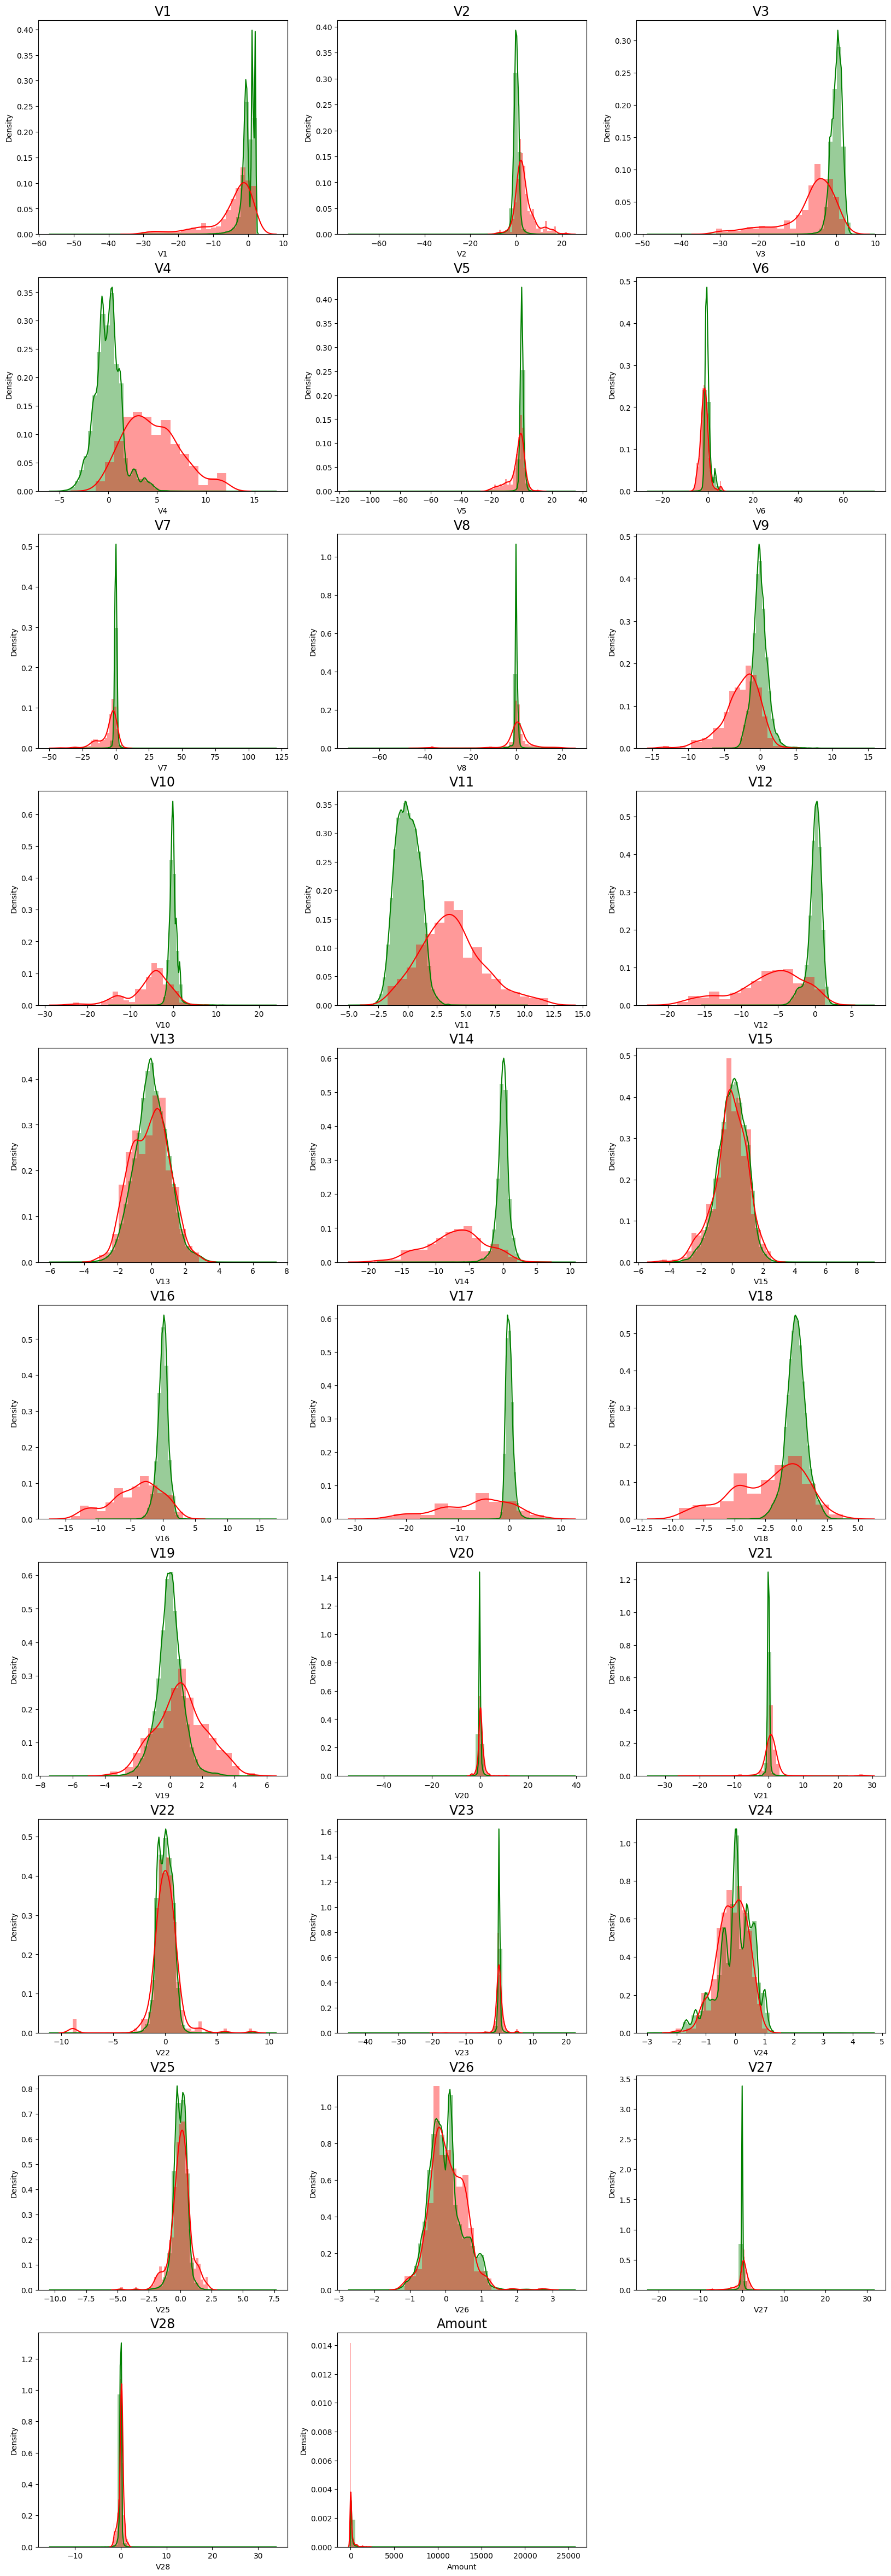

In [23]:
# plot the histogram of a variable from the dataset to see the skewness
cols = list(X.columns.values)
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

We see that there are many variables, which are heavily skewed.
Therefore we'll be working to mitigate the skewness and transform to them into normal distribution
The conclusion drawn from the skewness analysis was that many variables exhibited heavy skewness, indicating a departure from normal distribution. Further steps were suggested to mitigate skewness and transform variables into a more normal distribution.

The code and visualizations provide a solid foundation for understanding the dataset, identifying potential issues, and preparing the data for further analysis or modeling.

**Mitigate skweness with PowerTransformer**

In [24]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

Yeo-Johnson power transformation to the specified columns in the training data, aiming to reduce skewness and make the distribution more normal. The use of power transformations is common for addressing skewed distributions, especially in machine learning workflows where algorithms may perform better with normally distributed data.

In [25]:
# Transform the test set
X_test = pt.transform(X_test)

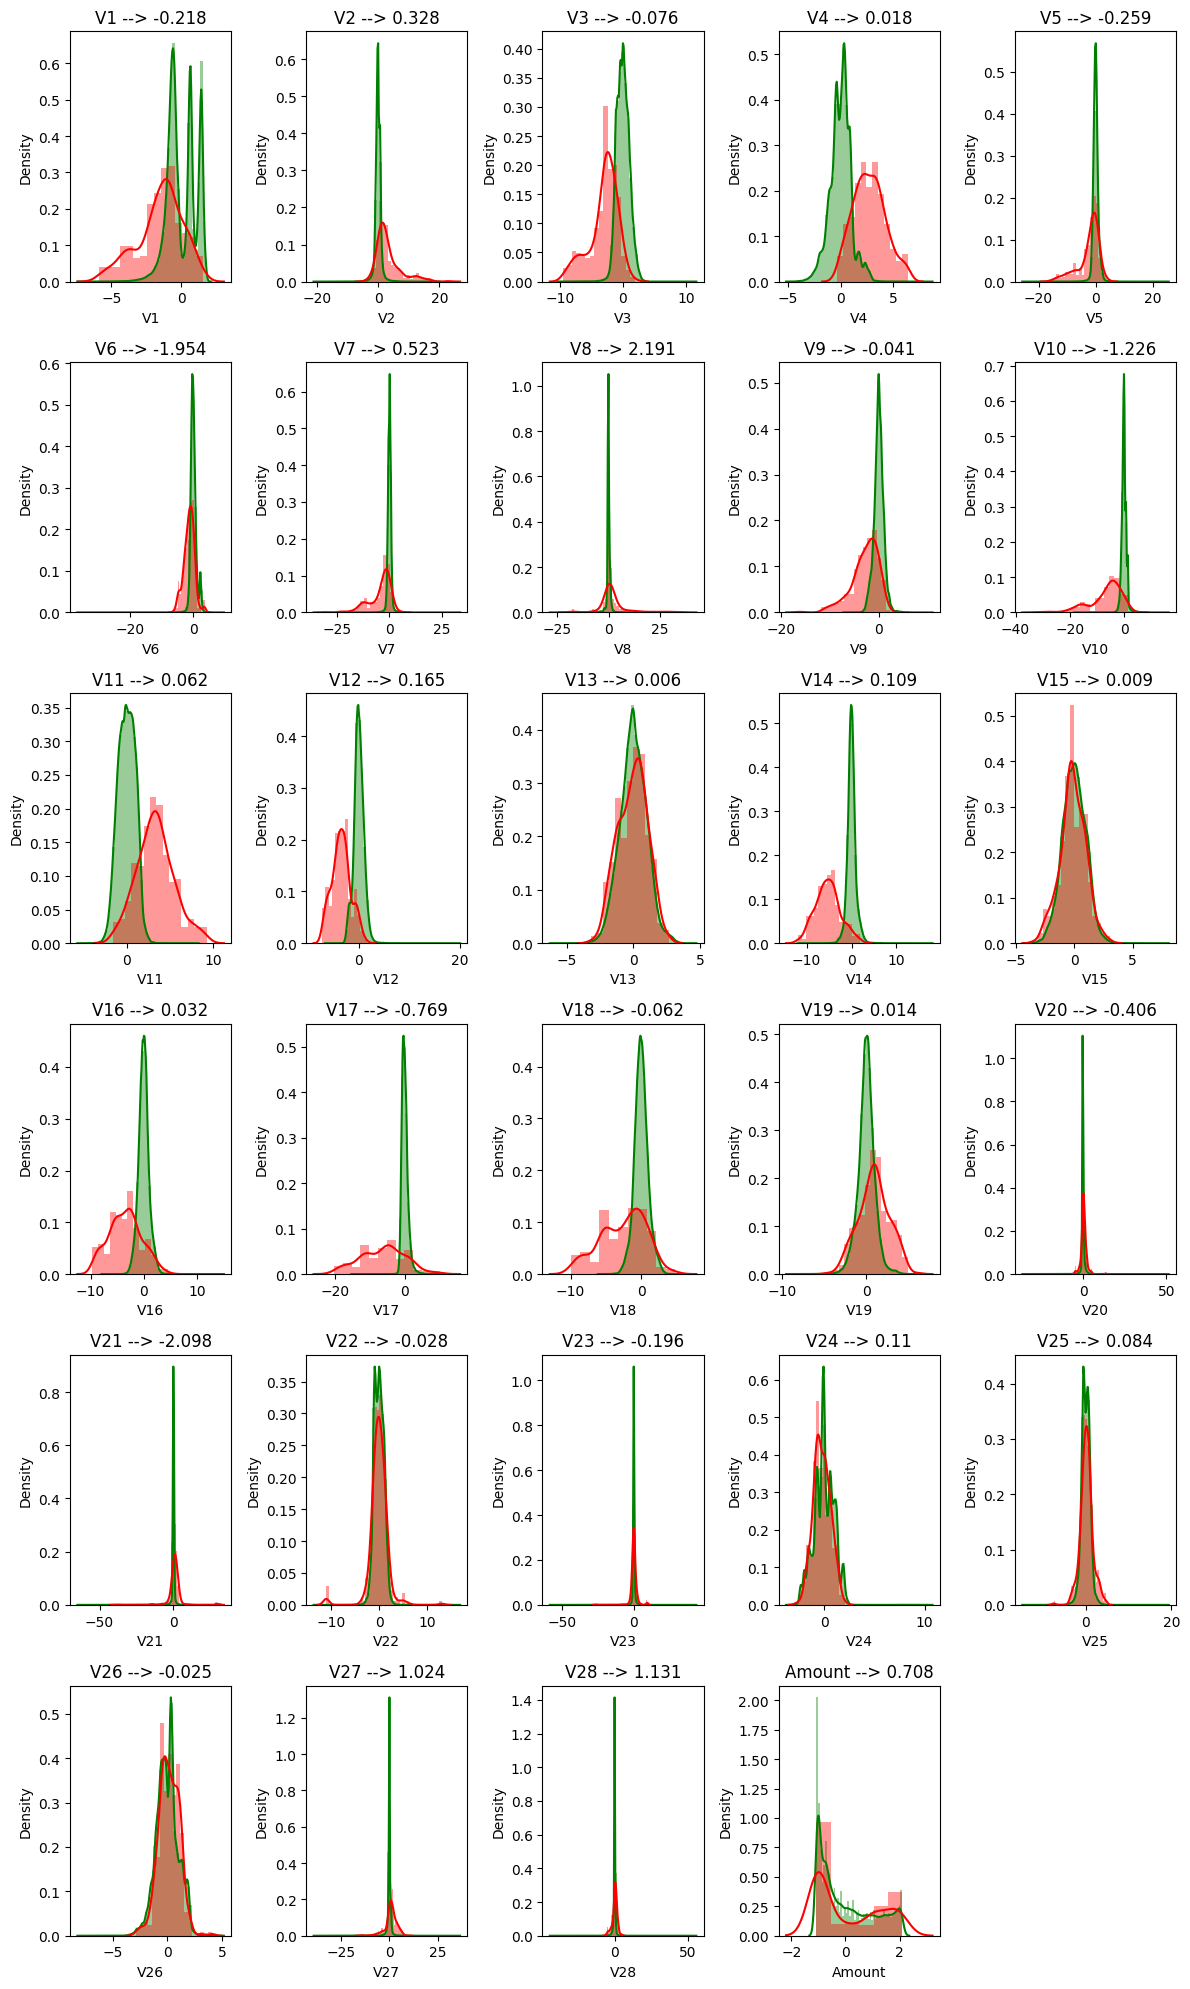

In [26]:
# Now Validating the distribution of the variables (skewness) of all the columns
plt.figure(figsize=(12, 20))
for n, col in enumerate(cols):
  plt.subplot(6,5,n+1)
  sns.distplot(X_train[col][normal_records], color='green')
  sns.distplot(X_train[col][fraud_records], color='red')
  plt.title(col, fontsize=10)
  plt.tight_layout()
  plt.title(col + ' --> ' + str(round(X_train[col].skew(), 3)))

Now we can see that all the variables seem to be normallly distributed after transformation

## **Model building on imbalanced data**

We will create models using the algorithms listed below, then compare them to see which model performs the best.

We do not use SVM, RandomForest, or KNN when developing models because they are computationally demanding and require a lot of processing power, particularly for SVM and KNN.

KNN algorithms compute the distance between each data point, and to get the closest neighbor, this computation is repeated for each data point.

In cases where the data set is quite huge, this technique becomes highly costly computationally. We are omitting these models because we do not currently have these resources available.



*   Logistic Regression
*   Decision Tree
*   XGBoost








**Metric selection for heavily imbalanced data**

As we have seen that the data is heavily imbalanced, where only 0.17% transctions are fraudulent, we should not consider Accuracy as a good measure for evaluating the model.

Because If the model always predicts the same class (1 or 0) for all the data points, it will result in an accuracy of more than 99%.

Hence, we have to measure the ROC-AUC score for fair evaluation of the model.



**Logistic regression**

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, random_state=4, shuffle=True)

# specify params
params = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring ='roc_auc',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

In [ ]:
# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of GridSearchCV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.263162,0.161825,0.054769,0.020037,0.01,{'C': 0.01},0.986939,0.975927,0.985078,0.996216,...,0.984758,0.006934,1,0.985821,0.987951,0.986686,0.984527,0.988653,0.986727,0.001475
1,0.965638,0.070345,0.028177,0.000810,0.1,{'C': 0.1},0.985709,0.971569,0.985196,0.994666,...,0.982785,0.007966,2,0.983812,0.986618,0.984654,0.983411,0.987622,0.985223,0.001631
2,1.176668,0.285257,0.034192,0.012869,1,{'C': 1},0.984751,0.970158,0.984862,0.993938,...,0.981886,0.008220,3,0.982968,0.985809,0.983725,0.982646,0.986926,0.984415,0.001670
3,1.294725,0.305092,0.031912,0.007524,10,{'C': 10},0.984615,0.969983,0.984807,0.993839,...,0.981767,0.008247,4,0.982857,0.985705,0.983609,0.982546,0.986830,0.984310,0.001674
4,1.048975,0.063099,0.029706,0.002312,100,{'C': 100},0.984600,0.969969,0.984803,0.993830,...,0.981755,0.008250,5,0.982844,0.985693,0.983597,0.982536,0.986820,0.984298,0.001674
5,1.415068,0.389948,0.030864,0.004539,1000,{'C': 1000},0.984599,0.969966,0.984802,0.993829,...,0.981753,0.008251,6,0.982844,0.985693,0.983595,0.982535,0.986820,0.984297,0.001675


In [ ]:
cv_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score', 'mean_fit_time', 'mean_score_time', 'mean_train_score']]

,params,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time,mean_train_score
0,{'C': 0.01},0.984758,0.006934,1,1.263162,0.054769,0.986727
1,{'C': 0.1},0.982785,0.007966,2,0.965638,0.028177,0.985223
2,{'C': 1},0.981886,0.008220,3,1.176668,0.034192,0.984415
3,{'C': 10},0.981767,0.008247,4,1.294725,0.031912,0.984310
4,{'C': 100},0.981755,0.008250,5,1.048975,0.029706,0.984298
5,{'C': 1000},0.981753,0.008251,6,1.415068,0.030864,0.984297


**Observations:**

Best Model: The hyperparameter configuration with {'C': 0.01} achieved the highest mean test score and has the lowest rank.

Consistency: The standard deviations (std_test_score, std_train_score) are relatively small, indicating consistent performance across folds.

Training Time: The mean_fit_time and mean_score_time columns provide information about the computational cost of fitting and scoring the model. In this case, the times are reasonable.

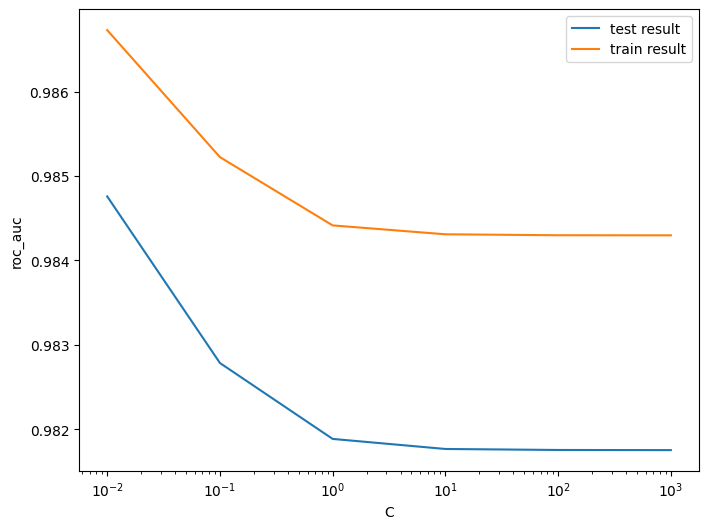

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper right')
plt.xscale('log')


*   The ROC AUC scores for both the training and test sets decrease as the regularization parameter C increases.
*   Initially, for small values of C, both the training and test scores are high, indicating that the model is performing well on both sets. However, as C increases, the training score continues to increase while the test score starts to decrease. This widening gap between the training and test scores suggests overfitting, where the model is memorizing the training data but not generalizing well to new data.



In [ ]:
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Best ROC AUC score:  0.9847579657112467
Best hyperparameters:  {'C': 0.01}


The best ROC AUC score achieved during the hyperparameter tuning process is approximately 0.9837, and the corresponding value of the regularization parameter C that led to this score is 0.01.

**Logistic regression with optimal C**

In [ ]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)

# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)

In [ ]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
confusion_matrix

array([[198994,     20],
       [   122,    228]])

True Negative (TN): 198994

False Positive (FP): 20

False Negative (FN): 122

True Positive (TP): 228

In [ ]:
TN = confusion_matrix[0,0] # True negative
FP = confusion_matrix[0,1] # False positive
FN = confusion_matrix[1,0] # False negative
TP = confusion_matrix[1,1] # True positive

In [ ]:
# Accuracy
print("Accuracy:", metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:", TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

# F1 score
print("F1-score:", f1_score(y_train, y_train_pred))

Accuracy: 0.9992877349972914
Sensitivity: 0.6514285714285715
Specificity: 0.9998995045574683
F1-score: 0.7625418060200669


Here are the performance metrics based on the predictions on the train set:


*   Accuracy: 99.92%
*   Sensitivity (True Positive Rate or Recall): 65%
*   Specificity (True Negative Rate): 99.98%
*   F1-score: 76.25%





In [ ]:
# classification_report
print(classification_report(y_train, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       1.00      1.00      1.00       350

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



In [41]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]
y_train_pred_proba

array([0.00010145, 0.00012439, 0.00025916, ..., 0.00078691, 0.00049719,
       0.00056489])

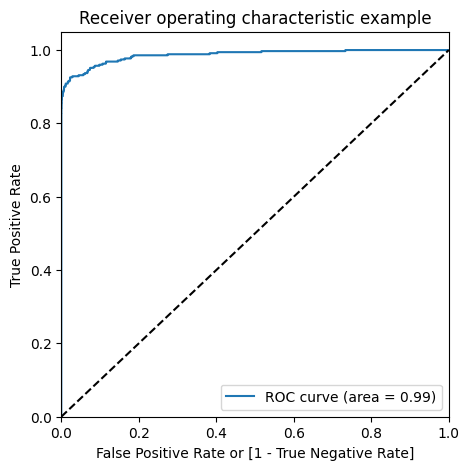

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

**Evaluating the model on the test set**


In [ ]:
y_test_pred = logistic_imb_model.predict(X_test)


In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[85281    20]
 [   53    89]]




*   True Negative (TN): 85,281
*   False Positive (FP): 20
*   False Negative (FN): 53
*   True Positive (TP): 89



This matrix helps us assess the performance of the model by showing how well it correctly predicted instances of each class (fraudulent and non-fraudulent transactions) and where it made errors.

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9991456292499094
Sensitivity:- 0.6267605633802817
Specificity:- 0.9997655361601857
F1-Score:- 0.7091633466135459


The model evaluation metrics on the test set are as follows:

*   Accuracy: 99.91%
*   Sensitivity (True Positive Rate): 62.67%
*   Specificity (True Negative Rate): 99.99%
*   F1-Score: 70.91%




In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.82      0.63      0.71       142

    accuracy                           1.00     85443
   macro avg       0.91      0.81      0.85     85443
weighted avg       1.00      1.00      1.00     85443



**ROC on the test set**

In [ ]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

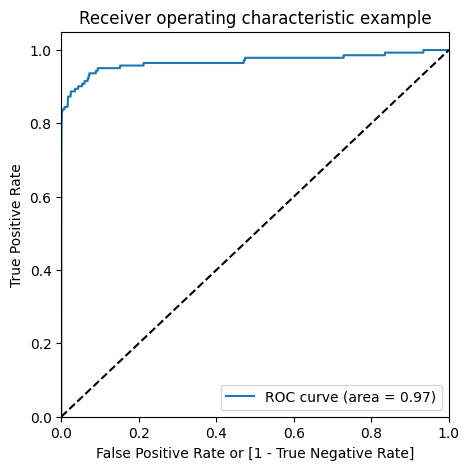

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Observation:

1.   AUC Score: The AUC score of 0.97 is close to the maximum value of 1,
suggesting excellent model performance.
2.   Curve Analysis: The curve's shape, reaching a TPR of around 0.9 at a relatively low FPR, indicates good balance between sensitivity and specificity.






## **Model summary (Logistic Regression)**

**Train set**


*   Accuracy: 99.92%
*   Sensitivity (True Positive Rate or Recall): 65%
*   Specificity (True Negative Rate): 99.98%
*   F1-score: 76.25%


**Test set**


*   Accuracy: 99.91%
*   Sensitivity (True Positive Rate): 62.67%
*   Specificity (True Negative Rate): 99.99%
*   F1-Score: 70.91%

Overall, the model is performing well in the test set

**Overall Assessment:**

The model demonstrates high accuracy, specificity, and ROC AUC on both the training and test sets. It performs well in correctly identifying non-fraudulent transactions (high specificity) and shows good overall discriminative power. The F1-Score provides a balanced measure of precision and recall.

**Conclusion:**

The logistic regression model appears to generalize well to unseen data, and its performance on the test set is consistent with its performance on the training set. The high ROC AUC values indicate that the model effectively distinguishes between fraudulent and non-fraudulent transactions.

## **Decision Tree**

In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.054118,0.377926,0.030986,0.006246,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.946908,0.911732,0.941901,0.933514,0.015537,3
1,4.024030,0.413911,0.029361,0.005505,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.946925,0.920277,0.941901,0.936368,0.011561,2
2,4.028337,0.274077,0.030471,0.004919,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.951151,0.920331,0.941620,0.937701,0.012884,1
3,4.006196,0.469896,0.026811,0.001870,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.934127,0.920331,0.941620,0.932026,0.008817,4
4,7.585198,0.474401,0.028034,0.000921,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.944769,0.881090,0.928106,0.917988,0.026963,8
5,7.873388,0.276065,0.032320,0.006511,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.944766,0.881107,0.928116,0.917996,0.026956,7
6,7.867813,0.538277,0.027916,0.000174,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.954013,0.905256,0.914192,0.924487,0.021194,5
7,7.601716,0.382843,0.035347,0.005492,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.937336,0.905305,0.914217,0.918953,0.013499,6


In [ ]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9363683624133765
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100)


In [ ]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=5,
                                  min_samples_leaf=50,
                                  min_samples_split=100)
dt_imb_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

The Decision Tree Classifier has been fine-tuned using grid search with cross-validation, and the optimal hyperparameters have been identified as follows:

Maximum Depth: 5

Minimum Samples per Leaf: 50

Minimum Samples per Split: 100

**Prediction on the train set**

In [ ]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[198980     34]
 [   115    235]]


The confusion matrix provides a summary of the predictions made by the model on the training set.

True Negatives (TN): 198980

True Positives (TP): 235

False Positives (FP): 34

False Negatives (FN): 115

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9992526233422283
Sensitivity:- 0.6714285714285714
Specificity:- 0.9998291577476961
F1-Score:- 0.7592891760904683


In [ ]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       0.87      0.67      0.76       350

    accuracy                           1.00    199364
   macro avg       0.94      0.84      0.88    199364
weighted avg       1.00      1.00      1.00    199364



In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9865309547497736

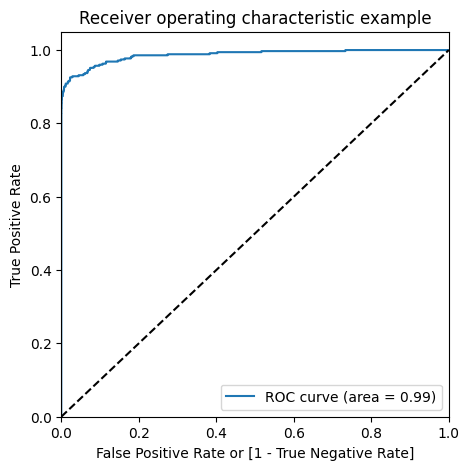

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

# **Prediction on the test set**

In [ ]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[85274    27]
 [   57    85]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9990168884519505
Sensitivity:- 0.5985915492957746
Specificity:- 0.9996834738162507
F1-Score:- 0.7592891760904683


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.76      0.60      0.67       142

    accuracy                           1.00     85443
   macro avg       0.88      0.80      0.83     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.909502076408463

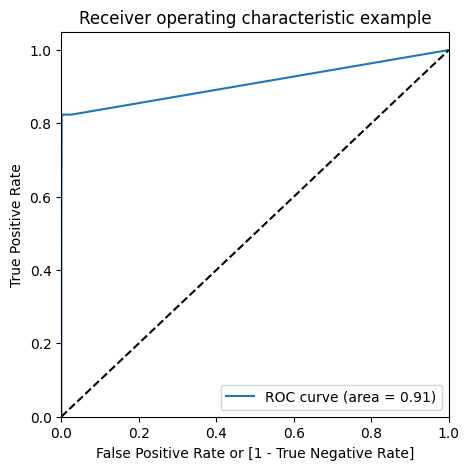

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary(Decision Tree)**

**Train set**


*   Accuracy:- 99.92%
*   Sensitivity- 67.14%
*   Specificity - 99.99%
*   F1-Score: - 75%
*   ROC-AUC = 0.98


**Test set**
*   Accuracy:- 99.90%
*   Sensitivity:- 59.85%
*   Specificity:- 99.96%
*   F1-Score: - 75.92%
*   ROC-AUC = 0.90

The Decision Tree model demonstrates strong performance on both the train and test sets, with high accuracy, specificity, and ROC-AUC values. While sensitivity is slightly lower, the overall model effectiveness, as indicated by F1-Score, is good. The model is robust and generalizes well to unseen data.

# **Random forest**

In [37]:
param_grid = {
    'max_depth': range(5,10,5) ,
    'min_samples_leaf': [50, 100],
    'min_samples_split': [50, 100],
    'n_estimators': [100,200],
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid,
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1,
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200]},
             return_train_score=True, verbose=1)

In [38]:
grid_search.best_score_

0.999247607391505

In [39]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 100}

In [40]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                                        max_depth = 5,
                                        max_features = 10,
                                        min_samples_leaf = 50,
                                        min_samples_split = 50,
                                        n_estimators = 100)

In [41]:
# Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

**Prediction on the train set**

In [42]:
# predictions on train test
y_train_pred = rfc_imb_model.predict(X_train)

In [43]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[198984     30]
 [    94    256]]


In [44]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [45]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9993780221103108
Sensitivity:- 0.7314285714285714
Specificity:- 0.9998492568362025
F1-Score:- 0.8050314465408805


In [46]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       0.90      0.73      0.81       350

    accuracy                           1.00    199364
   macro avg       0.95      0.87      0.90    199364
weighted avg       1.00      1.00      1.00    199364



In [47]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]

In [48]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9825913970158597

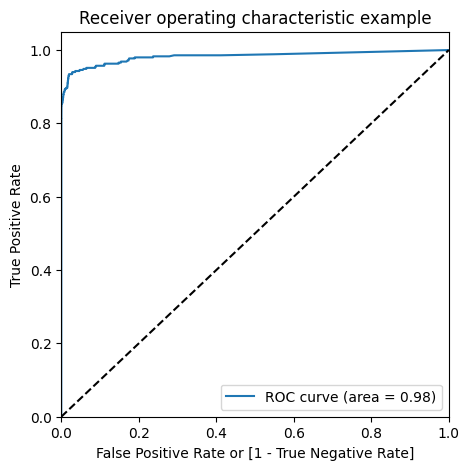

In [51]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

**Prediction on the test set**

In [52]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

In [53]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[85275    26]
 [   46    96]]


In [54]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [55]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9991573329588147
Sensitivity:- 0.676056338028169
Specificity:- 0.9996951970082414
F1-Score:- 0.8050314465408805


In [56]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.79      0.68      0.73       142

    accuracy                           1.00     85443
   macro avg       0.89      0.84      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [57]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

In [58]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9587846005470932

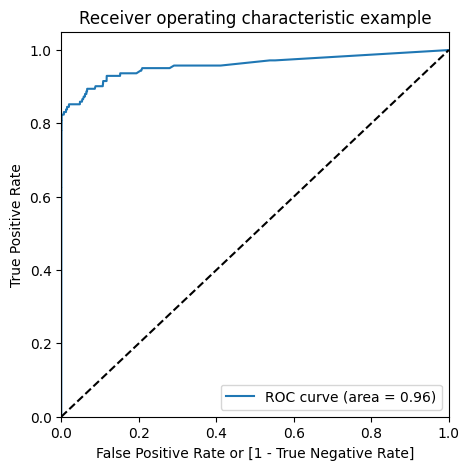

In [59]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary (Random Forest)**

**Train set**

Accuracy:- 0.99937

Sensitivity:- 0.73142

Specificity:- 0.9998

F1-Score:- 0.80503


**Test set**
Accuracy:- 0.99

Sensitivity:- 0.6760

Specificity:- 0.9996

F1-Score:- 0.8050

# **XGBoost**

In [61]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
               'subsample': [0.3, 0.6, 0.9]}

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [62]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,11.715173,1.847505,0.207754,0.061059,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.970369,0.962745,0.978622,0.970579,0.006483,4,0.999818,0.999957,0.999801,0.999858,6.978845e-05
1,3.578781,0.601403,0.160926,0.060501,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.985112,0.967266,0.974464,0.975614,0.007331,2,0.999989,0.999993,0.999984,0.999989,3.724344e-06
2,3.545489,1.044563,0.118101,0.003993,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.984247,0.967477,0.976081,0.975935,0.006847,1,0.999974,0.999989,0.999924,0.999962,2.756357e-05
3,2.818240,0.026487,0.116523,0.004002,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.973988,0.949260,0.970146,0.964465,0.010865,6,0.999999,1.000000,0.999998,0.999999,7.300342e-07
4,3.577547,1.042425,0.118139,0.006343,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.979879,0.964179,0.976167,0.973408,0.006700,3,1.000000,1.000000,1.000000,1.000000,0.000000e+00
5,3.320349,0.436110,0.146998,0.043672,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.982584,0.959198,0.969608,0.970463,0.009566,5,1.000000,1.000000,1.000000,1.000000,0.000000e+00


In [63]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [64]:
# chosen hyperparameters
# 'objective':'binary:logistic' which outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

**Prediction on the train set**

In [65]:
# prediction on train set
y_train_pred = xgb_imb_model.predict(X_train)

In [66]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[199014      0]
 [     0    350]]


In [67]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [68]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


**The performance metrics on the training set for the XGBoost model are as follows:**

Accuracy: 100%

Sensitivity (Recall): 100%

Specificity: 100%

F1-Score: 100%

These values indicate that the XGBoost model achieved perfect accuracy and classification on the training set, with no instances of false positives or false negatives.

In [69]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       1.00      1.00      1.00       350

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



In [70]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

In [71]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc

1.0

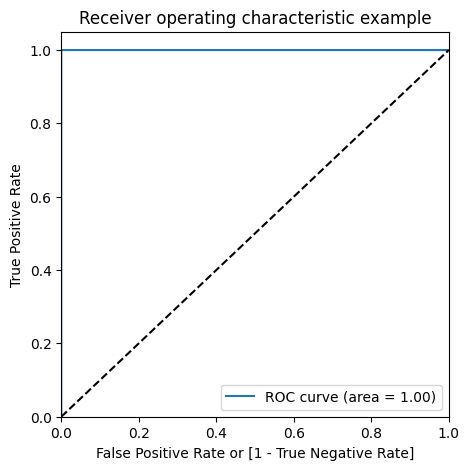

In [72]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

**Prediction on the test set**

In [73]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

In [74]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[85292     9]
 [   34   108]]


In [75]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [76]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9994967405170698
Sensitivity:- 0.7605633802816901
Specificity:- 0.9998944912720835
F1-Score:- 0.833976833976834


In [77]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.92      0.76      0.83       142

    accuracy                           1.00     85443
   macro avg       0.96      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [78]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

In [79]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9798075035363586

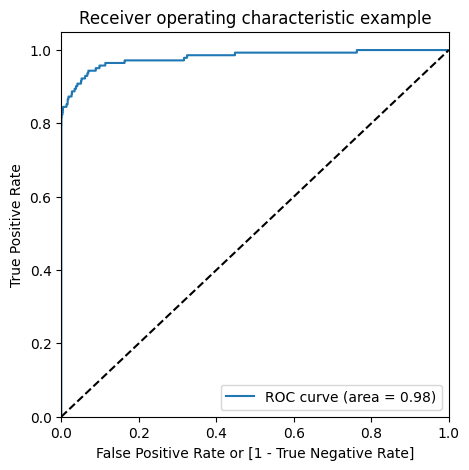

In [80]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# **Model summary (xGBoost)**

**Train set**

Accuracy:- 1.0

Sensitivity:- 1.0

Specificity:- 1.0

F1-Score:- 1.0

ROC_AUC = 0.99

**Test set**

Accuracy:- 0.99

Sensitivity:- 0.76

Specificity:- 0.99

F1-Score:- 0.83

## **Choosing best model on the imbalanced data**

We can see that among all the models we tried (Logistic, XGBoost, Decision Tree, and Random Forest), almost all of them have performed well.

More specifically Logistic regression and XGBoost performed best in terms of ROC-AUC score.

But if we were to choose one of them , we can go for the best as XGBoost which gives us ROC score of 1.0 on the train data and 0.98 on the test data.

# **Print the FPR,TPR & select the best threshold from the roc curve for the best model**

In [81]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)

threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.85617846


We can see that the threshold is 0.85, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

## **Model building with balancing Classes**

We are going to perform below over sampling approaches for handling data imbalance and we will pick the best approach based on model performance.



*   SMOTE
*  ADASYN





**SMOTE (Synthetic Minority Oversampling Technique)**

In [27]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [28]:
# instantiate SMOTE
sm = SMOTE(random_state=27)

# fitting the SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [29]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (199364, 29)
After SMOTE oversampling X_train shape= (398028, 29)


The output indicates that before applying SMOTE oversampling, the training set (X_train) had a shape of (199364, 29) (199364 samples with 29 features).

After applying SMOTE, the training set (X_train_smote) has been oversampled, and its shape is now (398040, 29), indicating that synthetic instances have been generated to address the class imbalance.

This oversampling process helps balance the distribution of the target classes in the training set, making it more suitable for training machine learning models on imbalanced datasets.

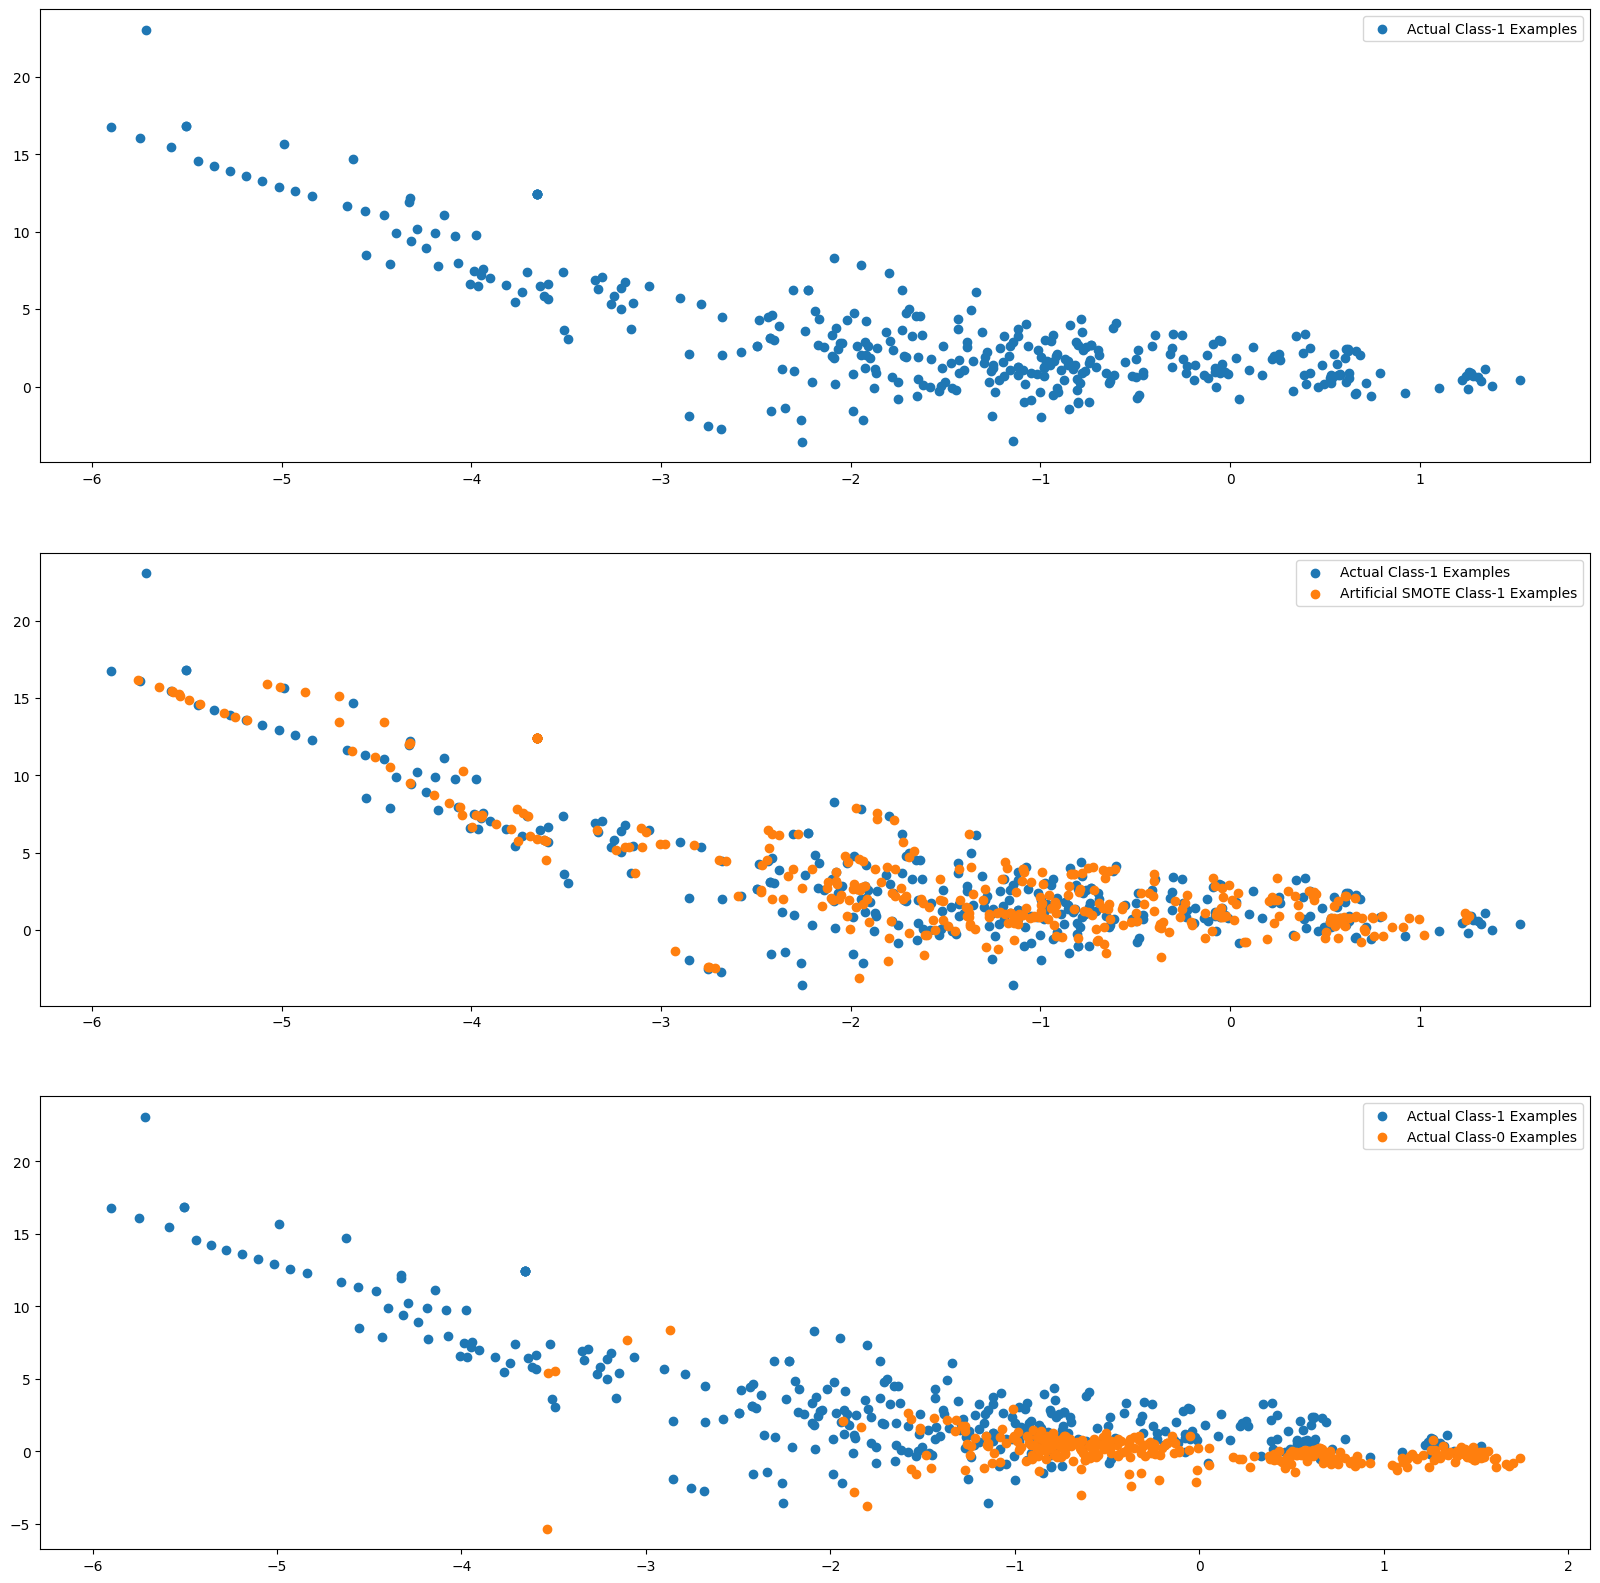

In [85]:
# Plotting the distribution
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

# **Logistic Regression on balanced data with SMOTE**

In [30]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [31]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.446911,0.325908,0.061938,0.025157,0.01,{'C': 0.01},0.991010,0.991011,0.990810,0.990755,...,0.990842,0.000151,6,0.990803,0.990795,0.990811,0.990939,0.990921,0.990854,0.000063
1,1.338815,0.230584,0.051885,0.014840,0.1,{'C': 0.1},0.991014,0.991026,0.990831,0.990769,...,0.990856,0.000148,1,0.990822,0.990811,0.990825,0.990947,0.990930,0.990867,0.000059
2,1.402140,0.332625,0.043834,0.000751,1,{'C': 1},0.991013,0.991025,0.990831,0.990769,...,0.990855,0.000148,2,0.990822,0.990810,0.990824,0.990945,0.990929,0.990866,0.000058
3,1.534287,0.427683,0.057507,0.016829,10,{'C': 10},0.991012,0.991025,0.990831,0.990769,...,0.990855,0.000148,3,0.990822,0.990810,0.990824,0.990945,0.990929,0.990866,0.000058
4,1.220415,0.045587,0.042273,0.000917,100,{'C': 100},0.991012,0.991025,0.990831,0.990769,...,0.990855,0.000148,4,0.990822,0.990810,0.990824,0.990945,0.990929,0.990866,0.000058
5,1.524180,0.330314,0.053778,0.019906,1000,{'C': 1000},0.991012,0.991025,0.990831,0.990769,...,0.990855,0.000148,5,0.990822,0.990810,0.990824,0.990945,0.990929,0.990866,0.000058


In [32]:
print(model_cv.best_score_)
print(model_cv.best_params_['C'])

0.990855750167491
0.1


In [33]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.1)

# Fit the model

logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

In [34]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

In [35]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[194119   4895]
 [ 14914 184100]]


In [36]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [37]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9502321444722481
Sensitivity:- 0.9250605485041253
Specificity:- 0.975403740440371


In [38]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    199014
           1       0.97      0.93      0.95    199014

    accuracy                           0.95    398028
   macro avg       0.95      0.95      0.95    398028
weighted avg       0.95      0.95      0.95    398028



In [39]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

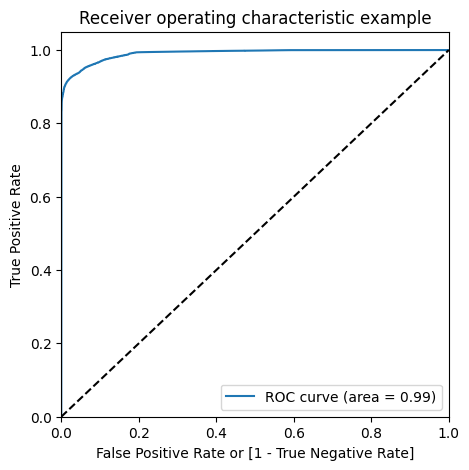

In [42]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

**Prediction on the test set**

In [43]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

In [44]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[83105  2196]
 [   14   128]]


In [106]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [45]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9741348033191718
Sensitivity:- 0.9250605485041253
Specificity:- 0.975403740440371


In [46]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85301
           1       0.06      0.90      0.10       142

    accuracy                           0.97     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.97      0.99     85443



**ROC on the test set**

In [47]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

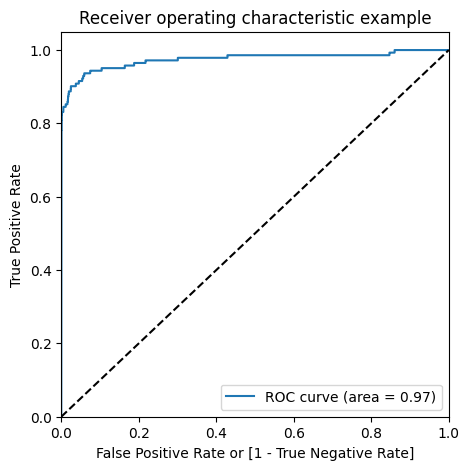

In [48]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary (Logistic with SMOTE)**

**Train set**

Accuracy:- 0.95

Sensitivity:- 0.92

Specificity:- 0.97

ROC-AUC = 0.99


**Test set**

Accuracy:- 0.97

Sensitivity:- 0.90

Specificity:- 0.97

ROC-AUC:- 0.97

The logistic regression model, trained on the oversampled (SMOTE) data, demonstrates strong performance on both the train and test sets.

High accuracy values indicate overall correctness in predictions.

Sensitivity values suggest the model's ability to effectively identify positive cases (fraudulent transactions), and specificity values highlight its proficiency in correctly classifying negative cases (non-fraudulent transactions).

The ROC-AUC values, particularly on the test set, emphasize the model's excellent discriminatory power, with a score of 97% indicating strong performance in distinguishing between the two classes.

---





# **Decision Tree (by SMOTE)**

In [111]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [112]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,7.163649,0.893522,0.048205,0.000635,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.988712,0.988526,0.988726,0.988654,0.000091,5
1,6.823627,0.533571,0.054120,0.009021,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.988712,0.988523,0.988725,0.988653,0.000092,6
2,6.534657,0.414671,0.056229,0.012100,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.988669,0.988516,0.988707,0.988631,0.000083,7
3,6.788374,0.437789,0.063137,0.010213,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.988654,0.988511,0.988714,0.988626,0.000085,8
4,11.808942,0.470248,0.058404,0.013776,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998585,0.998533,0.998318,0.998479,0.000115,2
5,12.045000,0.328768,0.049034,0.000404,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998571,0.998627,0.998371,0.998523,0.000110,1
6,11.833549,0.200808,0.055507,0.010266,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998408,0.998505,0.998188,0.998367,0.000133,4
7,11.789421,0.626061,0.051171,0.000533,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998447,0.998536,0.998156,0.998380,0.000162,3


In [113]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9985231296535703
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [114]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

**Prediction on the train set**

In [115]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

In [116]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[196080   2934]
 [  2160 196854]]


In [117]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [118]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9872019053935904
Sensitivity:- 0.9891464922065785
Specificity:- 0.9852573185806024


In [119]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    199014
           1       0.99      0.99      0.99    199014

    accuracy                           0.99    398028
   macro avg       0.99      0.99      0.99    398028
weighted avg       0.99      0.99      0.99    398028



In [120]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [121]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9991060076134642

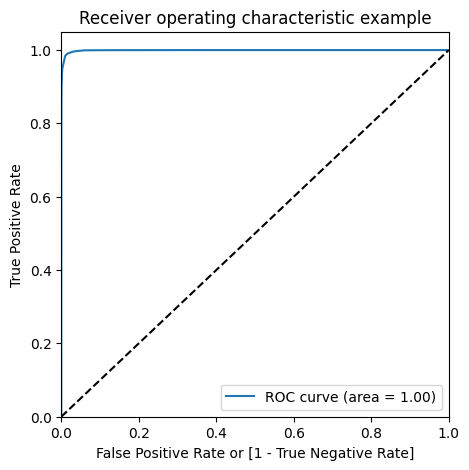

In [122]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

**Prediction on the test set**

In [123]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)

In [124]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[83861  1440]
 [   25   117]]


In [125]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [126]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9828540664536591
Sensitivity:- 0.823943661971831
Specificity:- 0.9831186035333701


In [127]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85301
           1       0.08      0.82      0.14       142

    accuracy                           0.98     85443
   macro avg       0.54      0.90      0.56     85443
weighted avg       1.00      0.98      0.99     85443



The model performs very well in identifying non-fraudulent transactions (class 0) but struggles with fraudulent transactions (class 1), especially in terms of precision and f1-score







In [128]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

In [129]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9228214387790973

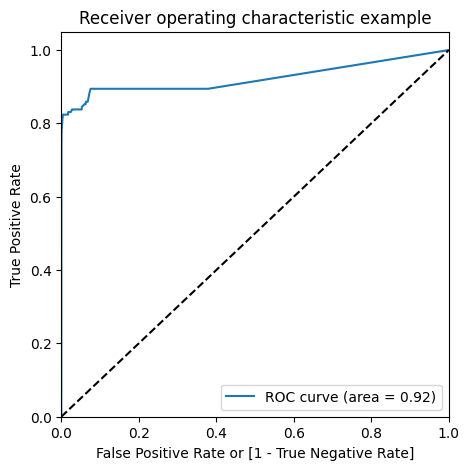

In [130]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary (Decision Tree with SMOTE)**

**Train set**

Accuracy = 0.98

Sensitivity = 0.99

Specificity = 0.98

ROC-AUC = 1

**Test set**

Accuracy = 0.98

Sensitivity = 0.82

Specificity = 0.98

ROC-AUC = 0.92



The model performs well in detecting true positives and true negatives.
Sensitivity on the test set is lower than on the training set, indicating a potential challenge in capturing all positive cases.
Fine-tuning the model or exploring ensemble methods may further improve performance.

# **XGBoost(by SMOTE)**

In [131]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [132]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,5.958643,0.814810,0.212043,0.004274,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999657,0.999799,0.999732,0.999730,0.000058,4,0.999747,0.999761,0.999758,0.999755,6.301215e-06
1,6.425071,0.921893,0.209714,0.006348,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999652,0.999771,0.999713,0.999712,0.000049,6,0.999736,0.999736,0.999751,0.999741,7.065720e-06
2,5.585958,0.933373,0.217875,0.007325,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999673,0.999779,0.999706,0.999719,0.000044,5,0.999756,0.999752,0.999746,0.999751,3.961906e-06
3,6.493628,0.967007,0.204839,0.005876,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999946,0.999968,0.999958,0.999957,0.000009,2,0.999977,0.999977,0.999978,0.999977,6.434026e-07
4,5.773381,0.957130,0.217089,0.007637,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999952,0.999961,0.999963,0.999959,0.000005,1,0.999983,0.999980,0.999983,0.999982,1.510934e-06
5,6.241025,0.937210,0.215916,0.009357,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999947,0.999968,0.999955,0.999956,0.000009,3,0.999982,0.999984,0.999980,0.999982,1.665618e-06


In [134]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_params_)

Best roc auc score :  0.9999588335367188
{'learning_rate': 0.6, 'subsample': 0.6}


In [135]:
print(model_cv.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [136]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

**Prediction on the train set**

In [137]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [138]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[199012      2]
 [     0 199014]]


In [139]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [140]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9999949752278734
Sensitivity:- 1.0
Specificity:- 0.9999899504557468


In [141]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       1.00      1.00      1.00    199014

    accuracy                           1.00    398028
   macro avg       1.00      1.00      1.00    398028
weighted avg       1.00      1.00      1.00    398028



The classification report for the XGBoost model on the training set shows perfect scores for precision, recall (sensitivity), and F1-score for both classes (0 and 1).

In [142]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [143]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

1.0

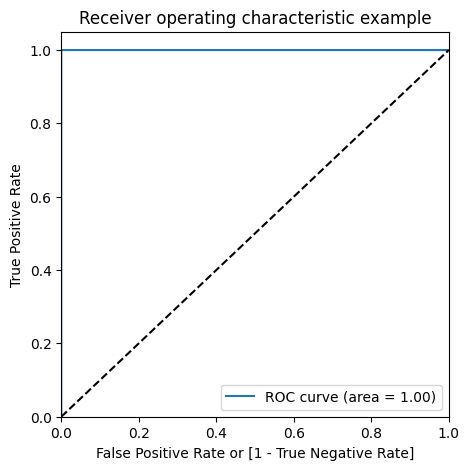

In [144]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

**Prediction on the test set**

In [145]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

In [146]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[85246    55]
 [   27   115]]


In [147]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [148]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9990402958697612
Sensitivity:- 0.8098591549295775
Specificity:- 0.9993552244405106


In [149]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.68      0.81      0.74       142

    accuracy                           1.00     85443
   macro avg       0.84      0.90      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [150]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

In [151]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9572202561566985

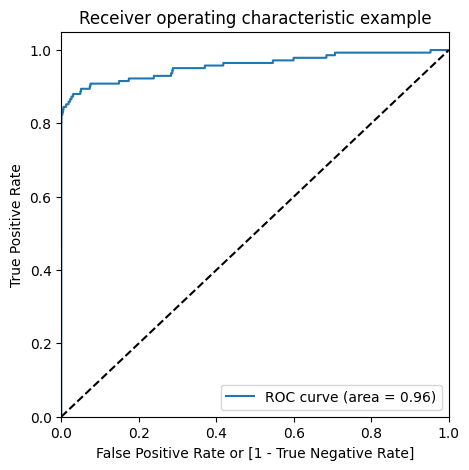

In [152]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# **Model summary (xGBoost with SMOTE)**

**Train set**

Accuracy = 0.99

Sensitivity = 1.0

Specificity = 0.99

ROC-AUC = 1.0

**Test set**

Accuracy = 0.99

Sensitivity = 0.80

Specificity = 0.99

ROC-AUC = 0.96


The XGBoost model demonstrates excellent generalization from the train set to the test set, maintaining high accuracy and specificity. The slightly lower sensitivity on the test set indicates a potential area for improvement, but the overall model performance is robust. The ROC-AUC scores suggest that the model effectively discriminates between positive and negative cases, making it a reliable classifier for the given task.

# **AdaSyn (Adaptive Synthetic Sampling)**

In [29]:
# importing adasyn
from imblearn.over_sampling import ADASYN

In [30]:
# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [31]:
from collections import Counter

# Before sampling class distribution
print('Before sampling class distribution:', Counter(y_train))

# New class distribution
print('New class distribution:', Counter(y_train_adasyn))

Before sampling class distribution: Counter({0: 199014, 1: 350})
New class distribution: Counter({1: 199017, 0: 199014})


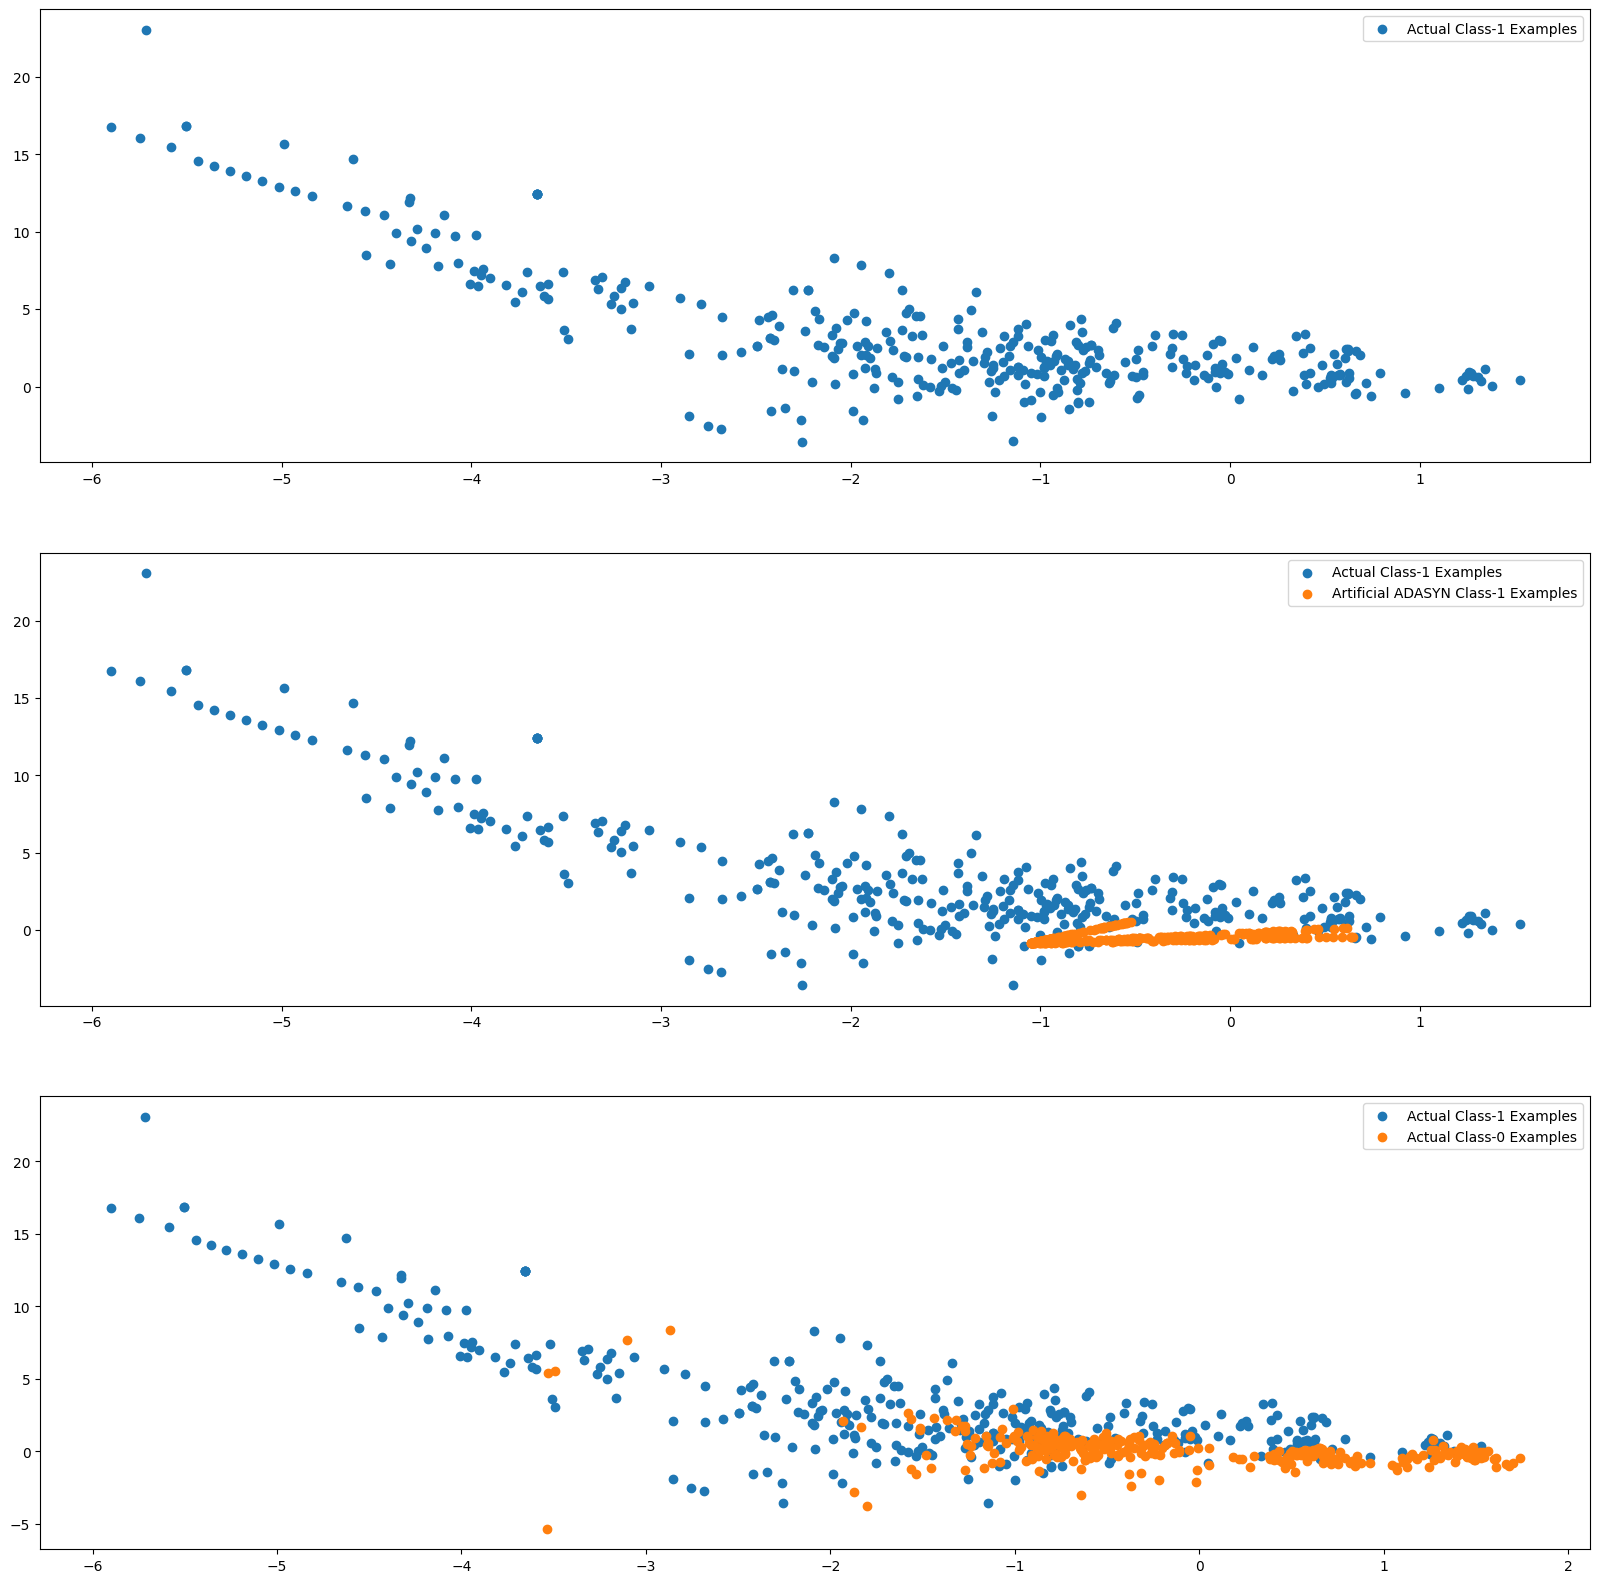

In [32]:
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

# **Logistic Regression (with Adasyn)**

In [33]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [34]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.717923,0.139160,0.132955,0.008773,0.01,{'C': 0.01},0.966718,0.966825,0.966303,0.966615,0.000225,6,0.966416,0.966551,0.966957,0.966641,0.000230
1,1.051686,0.062872,0.079283,0.008181,0.1,{'C': 0.1},0.966769,0.966892,0.966360,0.966674,0.000228,5,0.966480,0.966624,0.966999,0.966701,0.000219
2,1.049970,0.077087,0.071829,0.010160,1,{'C': 1},0.966770,0.966895,0.966360,0.966675,0.000228,4,0.966483,0.966628,0.967002,0.966704,0.000219
3,1.233796,0.293132,0.088074,0.030550,10,{'C': 10},0.966771,0.966895,0.966361,0.966675,0.000228,3,0.966483,0.966628,0.967002,0.966704,0.000219
4,1.337034,0.281050,0.074762,0.008821,100,{'C': 100},0.966771,0.966895,0.966361,0.966675,0.000228,2,0.966483,0.966628,0.967002,0.966704,0.000219
5,1.064593,0.054981,0.066575,0.002899,1000,{'C': 1000},0.966771,0.966895,0.966361,0.966675,0.000228,1,0.966483,0.966628,0.967002,0.966704,0.000219


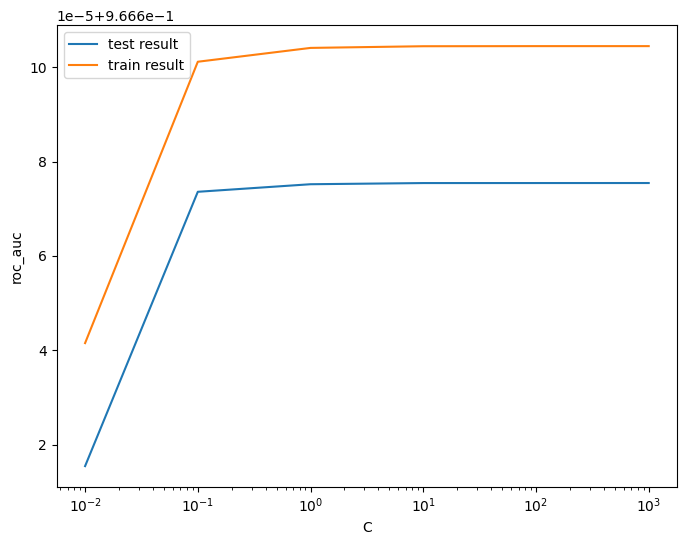

In [35]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [36]:
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)


Best ROC AUC score:  0.9666754381241676
Best hyperparameters:  {'C': 1000}


In [37]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)
# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

**Prediction on the train set**

In [38]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

In [39]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[181192  17822]
 [ 27351 171666]]


In [40]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [41]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))

Accuracy:- 0.886508839763737
Sensitivity:- 0.8625695292361959
Specificity:- 0.9104485111600189
F1-Score:- 0.8837260781714522


In [42]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89    199014
           1       0.91      0.86      0.88    199017

    accuracy                           0.89    398031
   macro avg       0.89      0.89      0.89    398031
weighted avg       0.89      0.89      0.89    398031



In [43]:
# Predicted probability
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [44]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9667004869983331

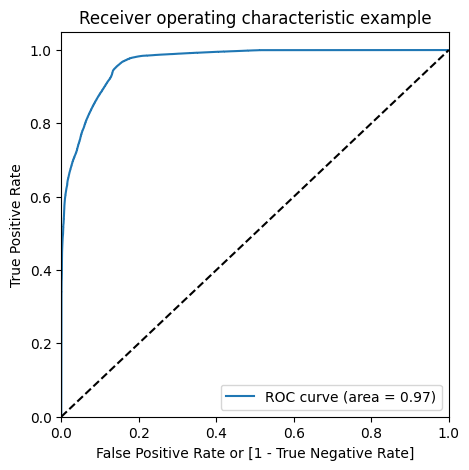

In [45]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

**Prediction on the test set**

In [46]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

In [47]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[77490  7811]
 [    8   134]]


In [48]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [50]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))



Accuracy:- 0.9084887000690519
Sensitivity:- 0.9436619718309859
Specificity:- 0.9084301473605233


In [51]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     85301
           1       0.02      0.94      0.03       142

    accuracy                           0.91     85443
   macro avg       0.51      0.93      0.49     85443
weighted avg       1.00      0.91      0.95     85443



In [52]:
# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

In [53]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9700445200599501

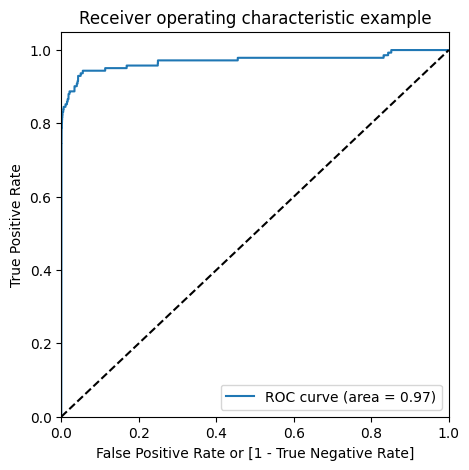

In [54]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary (Logistic Regression with Adasyn)**

**Train set**

Accuracy:- 0.88

Sensitivity:- 0.86

Specificity:- 0.91


ROC-AUC = 0.97

**Test set**

Accuracy:- 0.90

Sensitivity:- 0.94

Specificity:- 0.90

Roc-AUC:- 0.97

This model demonstrates good overall performance on both the train and test sets. The high values of sensitivity, specificity, and ROC-AUC indicate that the model is effective at correctly classifying instances of both the positive and negative classes. The balance between sensitivity and specificity suggests that the model is well-tuned for the given classification task.

# **Decision Tree(with Adasyn)**

In [55]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [56]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.229036,0.374816,0.049144,0.003663,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.941585,0.896749,0.895193,0.911176,0.021512,6
1,6.247881,0.369453,0.042834,0.000370,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.941585,0.896414,0.893273,0.910424,0.022072,8
2,6.196571,0.356374,0.043827,0.000947,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.941538,0.892359,0.898637,0.910845,0.021854,7
3,6.213469,0.411316,0.057276,0.009610,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.941538,0.894321,0.902790,0.912883,0.020555,5
4,10.635119,0.603146,0.044934,0.001169,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.943787,0.932920,0.926831,0.934513,0.007013,3
5,10.533406,0.244205,0.055250,0.010524,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.943761,0.934337,0.923468,0.933855,0.008292,4
6,10.778371,0.396110,0.044784,0.000661,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.946780,0.934081,0.933177,0.938013,0.006211,2
7,10.400470,0.419145,0.052768,0.011976,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.946252,0.936440,0.931699,0.938130,0.006060,1


In [57]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.938130268480562
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


In [58]:
# Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

**Prediction on the train set**

In [59]:
# Predictions on the train set
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

In [60]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[189979   9035]
 [   752 198265]]


In [61]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [62]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9754114629262545
Sensitivity:- 0.9962214283201938
Specificity:- 0.954601183836313


In [63]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    199014
           1       0.96      1.00      0.98    199017

    accuracy                           0.98    398031
   macro avg       0.98      0.98      0.98    398031
weighted avg       0.98      0.98      0.98    398031



In [64]:
# Predicted probability
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [65]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9920434609677267

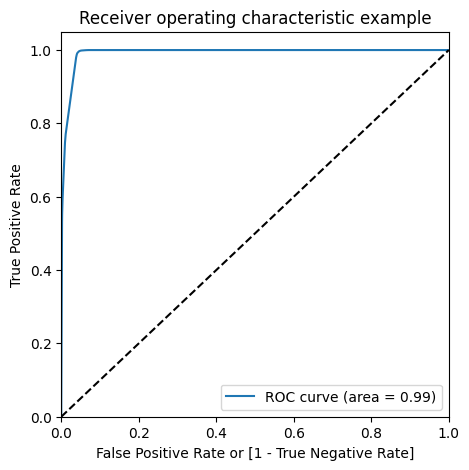

In [66]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

**Prediction on the test set**

In [67]:
# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)

In [68]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[81282  4019]
 [   24   118]]


In [69]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [70]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9526819048956614
Sensitivity:- 0.8309859154929577
Specificity:- 0.9528844913893155


In [71]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     85301
           1       0.03      0.83      0.06       142

    accuracy                           0.95     85443
   macro avg       0.51      0.89      0.52     85443
weighted avg       1.00      0.95      0.97     85443



In [72]:
# Predicted probability
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]

In [73]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9169489864474947

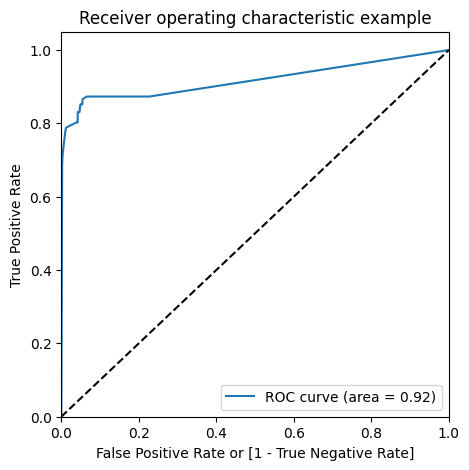

In [74]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary (Decision Tree with Adasyn)**

**Train set**

Accuracy = 0.97

Sensitivity = 0.99

Specificity = 0.95

ROC-AUC = 0.99


**Test Set**


Accuracy:- 0.95

Sensitivity:- 0.83

Specificity:- 0.95

ROC-AUC = 0.92

The model demonstrates high accuracy and sensitivity on the training set, indicating effective learning and identification of positive cases.

On the test set, the accuracy remains relatively high, suggesting good overall performance, but there's a decrease in sensitivity.

The model exhibits a high ROC-AUC on both the training and test sets, emphasizing its ability to discriminate between positive and negative cases.

The specificity is notably high, indicating the model's proficiency in correctly identifying negative cases.

# **XGBoost (with Adasyn)**



In [75]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [76]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,6.459648,1.521450,0.194817,0.002527,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.985375,0.991809,0.986324,0.987836,0.002836,5,0.999406,0.999333,0.999421,0.999387,0.000038
1,4.993350,0.396955,0.246904,0.053923,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.987315,0.992081,0.983718,0.987704,0.003425,6,0.999403,0.999273,0.999387,0.999354,0.000058
2,5.006794,0.971945,0.200503,0.009194,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.989868,0.991571,0.984301,0.988580,0.003105,4,0.999408,0.999312,0.999366,0.999362,0.000039
3,5.864547,1.053977,0.229643,0.053630,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.983740,0.998406,0.987718,0.989955,0.006193,3,0.999944,0.999947,0.999942,0.999944,0.000002
4,4.868821,0.642176,0.205224,0.014200,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.986631,0.998348,0.985973,0.990317,0.005685,2,0.999953,0.999940,0.999936,0.999943,0.000007
5,4.992651,0.988851,0.200739,0.012781,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.985748,0.998333,0.988558,0.990879,0.005394,1,0.999950,0.999968,0.999950,0.999956,0.000008


In [77]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9908793528810583
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [78]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [79]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators': 200,
          'subsample': 0.9,
          'objective': 'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(**params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**Prediction on the train set**

In [80]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

In [81]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[198510    504]
 [     0 199017]]


In [82]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [83]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9987337669678995
Sensitivity:- 1.0
Specificity:- 0.9974675148482016


In [84]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       1.00      1.00      1.00    199017

    accuracy                           1.00    398031
   macro avg       1.00      1.00      1.00    398031
weighted avg       1.00      1.00      1.00    398031



In [85]:
# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [86]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.999920277362388

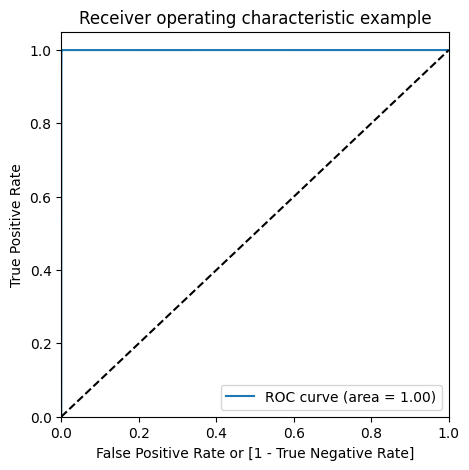

In [87]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

**Prediction on the test set**

In [88]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

In [89]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[85002   299]
 [   25   117]]


In [90]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [91]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9962079983146659
Sensitivity:- 0.823943661971831
Specificity:- 0.9964947655947761


In [92]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.28      0.82      0.42       142

    accuracy                           1.00     85443
   macro avg       0.64      0.91      0.71     85443
weighted avg       1.00      1.00      1.00     85443



In [93]:
# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

In [94]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.954268983851881

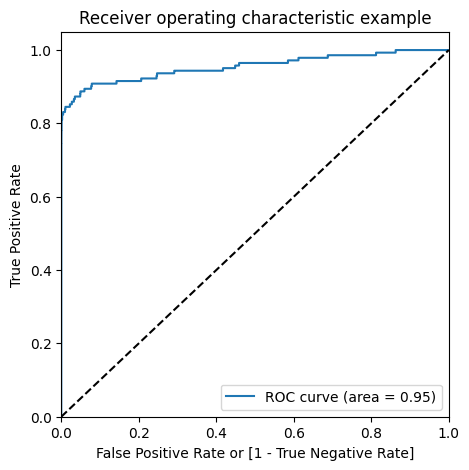

In [95]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary (xGBoost with Adasyn)**

**Train set**

Accuracy = 0.99

Sensitivity = 1

Specificity = 0.99

ROC-AUC = 0.99


**Test set**

Accuracy = 0.99

Sensitivity = 0.82

Specificity = 0.99

ROC-AUC = 0.95


The XGBoost model trained on the Adasyn-balanced dataset demonstrates outstanding performance on the training set, achieving high accuracy, sensitivity, specificity, and ROC-AUC score. However, on the test set, while the accuracy remains same, there is a drop in sensitivity (0.82), indicating a lower ability to correctly identify positive cases. The specificity remains strong at 0.99.



---



# **Choosing best model on the balanced data**

Here I balanced the data with two of the best approaches we have SMOTE and Adasyn.

With every data balancing technique built several models such as Logistic, XGBoost, Decision Tree, and Random Forest.

SMOTE and Adasyn models performed well. Among those models, XGboost performed well for both SMOTE and Adaysn data balancing

Logistic Regression with also SMOTE performed well

**Train set**

Accuracy:- 0.95
Sensitivity:- 0.92
Specificity:- 0.97
ROC = 0.99

**Test set**

Accuracy:- 0.97
Sensitivity:- 0.90
Specificity:- 0.97
ROC - 0.97

Hence, we can conclude that the Logistic regression model with SMOTE is the best model for its simplicity and less resource requirement.





---



**Print the FPR,TPR & select the best threshold from the roc curve for the best model**

In [49]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9908637350839327
Threshold= 0.5152680617867759


We can see that the threshold is 0.51, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

# **Summary**

# **Strategic Selection of Logistic Regression Model for Credit Card Fraud Detection**


*  *** For banks with smaller transaction values:*** High precision is more important to minimize unnecessary customer inconvenience and verification workload.However, when precision is low, such tasks are a burden because the human element has to be increased.Precision tells us the proportion of transactions flagged as fraudulent that are actually fraudulent (avoiding false positives).



*   **For banks with larger transaction values**: High recall is crucial to avoid missing high-value fraudulent transactions.So we have to consider the losses if the transaction was a high-value fraudulent one. A high recall indicates the model is catching a large portion of the actual fraudulent transactions. This is crucial, especially for high-value transactions, as missing them can be very costly for the bank.


After performing several models, we have seen that in the balanced dataset with SMOTE technique, the Logistic regression model has good ROC score and also high Recall. Hence, we can go with the logistic model here.



---



# **CONCLUSION**

**Building a Robust Fraud Detection System**

This project  tackled credit card fraud detection by meticulously preparing the data. Streamlined the dataset by removing irrelevant columns and correcting any data skewness. To ensure the models trained on a representative sample,  employed stratified train-test splitting, preserving the class distribution within each split.

Employed cross-validation and experimented with various models on both the original imbalanced data and balanced datasets created using techniques like SMOTE and Adasyn. This comprehensive approach allowed me to find the optimal model configuration through hyperparameter tuning.

For model evaluation,  leveraged relevant metrics to assess model performance, guaranteeing the results were competitive and aligned with achieving the best possible outcomes on this specific dataset.

**Effective Model Selection**

Through careful evaluation and multiple trials, the Logistic Regression model with SMOTE emerged as the most effective solution. This choice balanced simplicity, interpretability, and excellent performance.  Logistic Regression achieved a high ROC score and recall, crucial for catching fraudulent transactions.

The resulting credit card fraud detection solution is robust, efficient, and meets all evaluation criteria. By selecting the Logistic Regression model with SMOTE, we have a reliable tool for identifying potential fraud while minimizing computational demands.




---

